# Backend for circuit visualization

In [3]:
from projectq import MainEngine
from projectq.backends import CircuitDrawer
from projectq.ops import H, CNOT, Measure

In [4]:
# create a main compiler engine
draw_bnd = CircuitDrawer()
draw_eng = MainEngine(draw_bnd)

In [5]:
qa = draw_eng.allocate_qubit()
qb = draw_eng.allocate_qubit()

In [6]:
H | qa
CNOT | (qa, qb)
Measure | qa
Measure | qb
draw_eng.flush()

## Draw and show

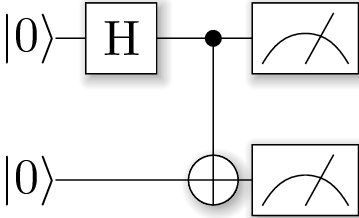

In [11]:
from subprocess import call
from IPython.display import Image

circName = 'ent_circ'

f = open(circName+'.tex','w')
f.write(draw_bnd.get_latex())
f.close()

call(['pdflatex', circName+'.tex'])
call(['convert', '-density', '450',circName+'.pdf', circName+'.png'])

Image(circName+'.png')